In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Load images, labels, masks

In [2]:
NPY_PATH = r"dataset\numpy"

labels = np.load(os.path.join(NPY_PATH,'labels.npy'))
t1w_images = (np.load(os.path.join(NPY_PATH,'T1W_images.npy')) / 255.0).astype(np.float32)
t2f_images = (np.load(os.path.join(NPY_PATH,'T2F_images.npy')) / 255.0).astype(np.float32)
t2w_images = (np.load(os.path.join(NPY_PATH,'T2W_images.npy')) / 255.0).astype(np.float32)
masks = (np.load(os.path.join(NPY_PATH,'Mask_images.npy')) / 255.0).astype(np.float32)

print(masks.shape)

(2356, 260, 320)


In [3]:
# 모델의 입력 형태에 맞추기 위해 차원을 확장합니다.
# example. (,260,320) -> (,260,320,1)
t1w_images = np.expand_dims(t1w_images,axis=-1)
t2f_images = np.expand_dims(t2f_images,axis=-1)
t2w_images = np.expand_dims(t2w_images,axis=-1)
masks = np.expand_dims(masks,axis=-1)

# Resizing

In [4]:
from util import downsample

img_size_ori = (260,320)
img_size_target = (256,256)

t1w_images = np.array([ downsample(image,img_size_ori,img_size_target) for image in t1w_images ])
t2f_images = np.array([ downsample(image,img_size_ori,img_size_target) for image in t2f_images ])
t2w_images = np.array([ downsample(image,img_size_ori,img_size_target) for image in t2w_images ])
masks = (np.array([ downsample(mask,img_size_ori,img_size_target) for mask in masks ])>0)*1.0

# Train & Test Split

In [5]:
from sklearn.model_selection import train_test_split
import gc

image_datasets = np.concatenate((t1w_images,t2f_images,t2w_images),axis=0)
mask_datasets = np.concatenate((masks,masks,masks),axis =0)
labels_datasets = np.concatenate((labels,labels,labels),axis =0)

X,X_v,Y,Y_v = train_test_split( image_datasets,mask_datasets,test_size=0.2,stratify=labels_datasets,random_state=444, shuffle=True)

del t1w_images
del t2f_images
del t2w_images
del masks
del labels

del image_datasets
del mask_datasets
del labels_datasets

gc.collect()

0

In [6]:
# from model import baseModel, unet_v1, unet_v2, unet_v3
# from util import bce_dice_loss, historyToJson, historyToPng, getIOUCurve
# from keras.metrics import MeanIoU
# from keras.models import load_model
# import json
# import numpy as np
# from numpyEncoder import NumpyEncoder
# from tqdm import tqdm

# model_lists = [baseModel,unet_v1,unet_v2,unet_v3]
# model_names = ['base_256','v1','v2','v3']
# model_input_shapes = [(256,256,1),(256,256,1),(256,256,1),(256,256,1)]

# for model_name, model_list, model_input_shape in tqdm(zip(model_names,model_lists, model_input_shapes)):

#     CHECKPOINT_NAME = f'model_{model_name}_best_checkpoint.h5'
#     HISTORY_PATH = f'model_{model_name}_history.json'
#     HISTORY_PNG_PATH = f'document/model_{model_name}_history.png'
#     BEST_THRESHOLD_PNG_PATH = f'document/model_{model_name}_best_threshold.png'
#     PREDICTION_IMAGE = f'document/model_{model_name}_prediction.png'

#     unet = model_list(input_shape=model_input_shape)
#     unet = load_model(CHECKPOINT_NAME, custom_objects={'bce_dice_loss': bce_dice_loss,'iou_metric':MeanIoU(num_classes=2,name="mean_iou")})

#     f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 8))
#     t = f.suptitle('Unet Performance \n Threshold vs IoU', fontsize=12)
#     f.subplots_adjust(top=0.85, wspace=0.3)

#     th, ious, iou_best, th_best = getIOUCurve(Y,unet.predict(X))
#     ax2.plot(th, ious,label="For Train")
#     ax2.plot(th_best, iou_best, "xr", label="Best threshold")
#     ax2.set_ylabel('IOU');ax1.set_xlabel('Threshold')
#     ax2.set_title("threshold : {}\niou : {}".format(th_best, iou_best))

#     th, ious, iou_best, th_best = getIOUCurve(Y_v,unet.predict(X_v))
#     ax1.plot(th, ious,label="For Validation")
#     ax1.plot(th_best, iou_best, "xr", label="Best threshold")
#     ax1.set_ylabel('IOU');ax1.set_xlabel('Threshold')
#     ax1.set_title("threshold : {}\niou : {}".format(th_best, iou_best))

#     plt.savefig(BEST_THRESHOLD_PNG_PATH)
#     plt.clf()

#     predicted_mask = (unet.predict(X_v)>(th_best))*1

#     i=1;total=30
#     temp = np.ones_like( Y_v[0] )

#     plt.figure(figsize=(8,90))
#     # for idx in np.random.randint(0,high=X_v.shape[0],size=total):
#     for idx in range(120,120+total):
#         plt.subplot(total,3,i);i+=1
#         plt.imshow(X_v[idx], cmap='gray' )
#         plt.title("MRI Image");plt.axis('off')
        
#         plt.subplot(total,3,i);i+=1
#         plt.imshow( X_v[idx], cmap='gray' )
#         plt.imshow( Y_v[idx], alpha=0.8, cmap='Reds' )
#         plt.title("Original Mask");plt.axis('off')
        
#         plt.subplot(total,3,i);i+=1
#         plt.imshow( X_v[idx], cmap='gray' )
#         plt.imshow( predicted_mask[idx],  alpha=0.8, cmap='Reds' )
#         plt.title("Predicted Mask");plt.axis('off')

#     plt.savefig(PREDICTION_IMAGE)
#     plt.clf()

#     with open(HISTORY_PATH,'r') as json_file:
#         json_data = json.load(json_file)
#         historyToPng(json_data,HISTORY_PNG_PATH)

<Figure size 720x576 with 0 Axes>

<Figure size 576x6480 with 0 Axes>

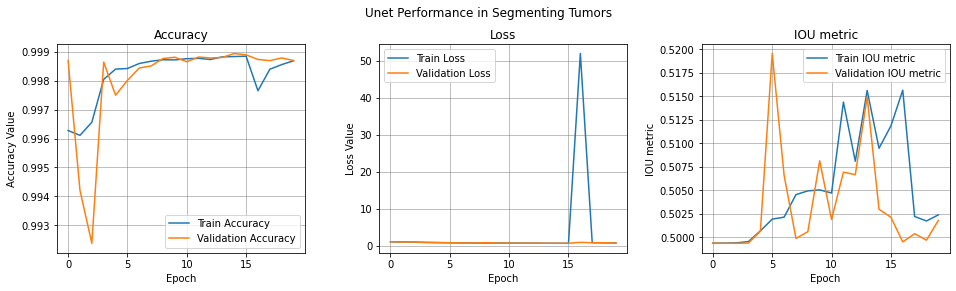

In [7]:
from model import baseModel, unet_v1, unet_v2, unet_v3
from util import bce_dice_loss, historyToJson, historyToPng, getIOUCurve
from keras.metrics import MeanIoU
from keras.models import load_model
import json
import numpy as np
from numpyEncoder import NumpyEncoder
from tqdm import tqdm

model_list = unet_v3
model_name = 'v3'
model_input_shape = (256,256,1)

CHECKPOINT_NAME = f'model_{model_name}_best_checkpoint.h5'
HISTORY_PATH = f'model_{model_name}_history.json'
HISTORY_PNG_PATH = f'document/model_{model_name}_history.png'
BEST_THRESHOLD_PNG_PATH = f'document/model_{model_name}_best_threshold.png'
PREDICTION_IMAGE = f'document/model_{model_name}_prediction.png'

unet = model_list(input_shape=model_input_shape)
unet = load_model(CHECKPOINT_NAME, custom_objects={'bce_dice_loss': bce_dice_loss,'iou_metric':MeanIoU(num_classes=2,name="mean_iou")})

f, (ax1) = plt.subplots(1,1, figsize=(10, 8))
t = f.suptitle('Unet Performance \n Threshold vs IoU', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

# th, ious, iou_best, th_best = getIOUCurve(Y,unet.predict(X))
# ax2.plot(th, ious,label="For Train")
# ax2.plot(th_best, iou_best, "xr", label="Best threshold")
# ax2.set_ylabel('IOU');ax1.set_xlabel('Threshold')
# ax2.set_title("threshold : {}\niou : {}".format(th_best, iou_best))

th, ious, iou_best, th_best = getIOUCurve(Y_v,unet.predict(X_v))
ax1.plot(th, ious,label="For Validation")
ax1.plot(th_best, iou_best, "xr", label="Best threshold")
ax1.set_ylabel('IOU');ax1.set_xlabel('Threshold')
ax1.set_title("threshold : {}\niou : {}".format(th_best, iou_best))

plt.savefig(BEST_THRESHOLD_PNG_PATH)
plt.clf()

predicted_mask = (unet.predict(X_v)>(th_best))*1

i=1;total=30
temp = np.ones_like( Y_v[0] )

plt.figure(figsize=(8,90))
# for idx in np.random.randint(0,high=X_v.shape[0],size=total):
for idx in range(120,120+total):
    plt.subplot(total,3,i);i+=1
    plt.imshow(X_v[idx], cmap='gray' )
    plt.title("MRI Image");plt.axis('off')
    
    plt.subplot(total,3,i);i+=1
    plt.imshow( X_v[idx], cmap='gray' )
    plt.imshow( Y_v[idx], alpha=0.8, cmap='Reds' )
    plt.title("Original Mask");plt.axis('off')
    
    plt.subplot(total,3,i);i+=1
    plt.imshow( X_v[idx], cmap='gray' )
    plt.imshow( predicted_mask[idx],  alpha=0.8, cmap='Reds' )
    plt.title("Predicted Mask");plt.axis('off')

plt.savefig(PREDICTION_IMAGE)
plt.clf()

with open(HISTORY_PATH,'r') as json_file:
    json_data = json.load(json_file)
    historyToPng(json_data,HISTORY_PNG_PATH)

In [8]:
# import os

# # The notifier function
# def notify(title, subtitle, message):
#     t = '-title {!r}'.format(title)
#     s = '-subtitle {!r}'.format(subtitle)
#     m = '-message {!r}'.format(message)
#     os.system('terminal-notifier {}'.format(' '.join([m, t, s])))

# # Calling the function
# notify(title    = 'Unet evaluate done',
#        subtitle = 'with jupyter',
#        message  = '')